# nuage de points 

### Chargement des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [38]:
# Charger les données du fichier texte
data = np.loadtxt("nuage_de_points.txt", skiprows=1)  # Charger les données depuis le fichier texte

# Extraire les coordonnées x, y, et z
x, y, z = data[:, 0], data[:, 1], data[:, 2]  # On sépare les coordonnées (x, y, z) dans des tableaux

# Afficher les premières lignes des données pour vérification
print("Aperçu des données (x, y, z) :")
print(data[:5])  # Affiche les 5 premières lignes pour vérifier les données

Aperçu des données (x, y, z) :
[[ 1.          1.         -2.08333333]
 [ 1.          2.         -3.45      ]
 [ 1.          3.         -4.06666667]
 [ 1.          4.         -4.08333333]
 [ 1.          5.         -4.9       ]]


### Régression des Moindres Carrés

In [39]:
# Créer la matrice X avec une colonne de 1 pour le biais
# On empile les colonnes (x, y) et une colonne de 1 pour représenter le biais (terme constant de l'équation du plan)
X = np.column_stack((x, y, np.ones_like(x)))  # Matrice des variables indépendantes (x, y, 1)

# Calcul des coefficients par la formule des moindres carrés : (X^T * X)^-1 * X^T * y
XT = X.T  # Transposée de X
XTX_inv = np.linalg.inv(XT @ X)  # Inverse de (X^T * X) en utilisant la multiplication matricielle (XT @ X)
XTy = XT @ z  # (X^T * y) : multiplication de la transposée de X par le vecteur z (les valeurs de la variable dépendante)
coeff = XTX_inv @ XTy  # Calcul des coefficients a, b, c en multipliant l'inverse de (X^T * X) par (X^T * y)

# Afficher les coefficients de la régression
print(f"Coefficients : a = {coeff[0]}, b = {coeff[1]}, c = {coeff[2]}")  # Affiche les coefficients a, b, et c

Coefficients : a = -0.29033333334000183, b = -0.6496666666600004, c = -1.5513333333200006


### Création de la Grille et Tracé 3D

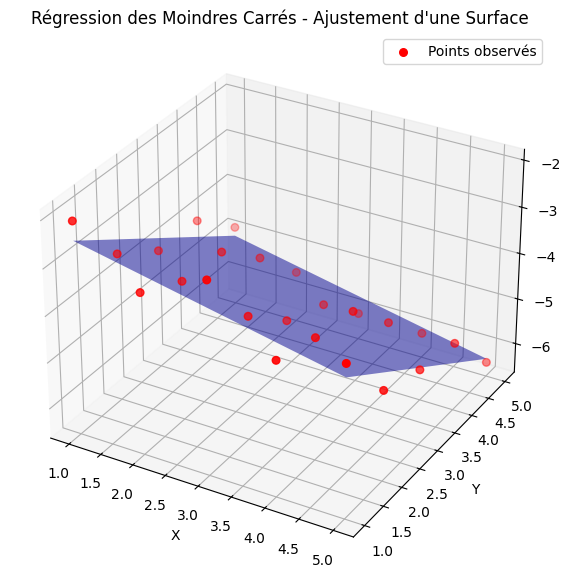

In [40]:
# Créer une grille pour la surface ajustée
# Générer des valeurs pour X et Y dans une plage définie par les données observées
X_grid, Y_grid = np.meshgrid(np.linspace(min(x), max(x), 50), np.linspace(min(y), max(y), 50))
# Calculer les valeurs de Z pour chaque combinaison de X et Y en utilisant l'équation du plan
Z_grid = coeff[0] * X_grid + coeff[1] * Y_grid + coeff[2]

# Visualiser les résultats avec une figure 3D
fig = plt.figure(figsize=(10, 7))  # Créer une figure de taille 10x7
ax = fig.add_subplot(111, projection='3d')  # Créer un sous-graphe en 3D

# Tracer les points observés
ax.scatter(x, y, z, color='r', label="Points observés", s=30)  # Tracer les points en rouge

# Tracer la surface ajustée
ax.plot_surface(X_grid, Y_grid, Z_grid, color='b', alpha=0.5, rstride=100, cstride=100)  # Surface ajustée en bleu

# Configurer les axes et le titre
ax.set_xlabel('X')  # Légende de l'axe X
ax.set_ylabel('Y')  # Légende de l'axe Y
ax.set_zlabel('Z')  # Légende de l'axe Z
ax.set_title('Régression des Moindres Carrés - Ajustement d\'une Surface')  # Titre du graphique

# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.show()  # Afficher la figure